In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import copy
%matplotlib inline

import sklearn
from sklearn.datasets import fetch_california_housing

plt.rcParams['font.size'] = 14

In [2]:
# Download data

tmp = sklearn.datasets.fetch_california_housing()

num_samples   = tmp['data'].shape[0]
feature_names = tmp['feature_names']
y = tmp['target']
X = tmp['data']

data = {}
for n, feature in enumerate(feature_names):
    data[feature] = tmp['data'][:,n]

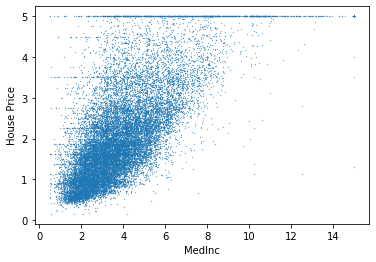

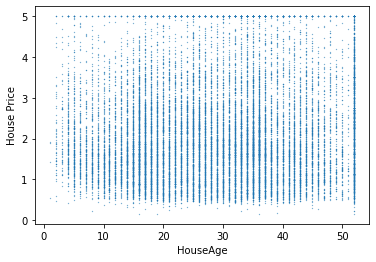

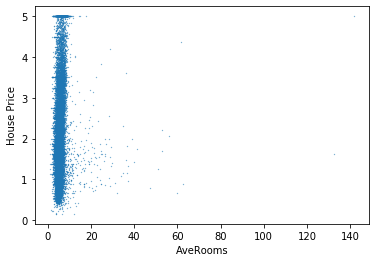

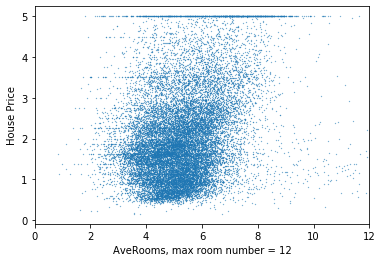

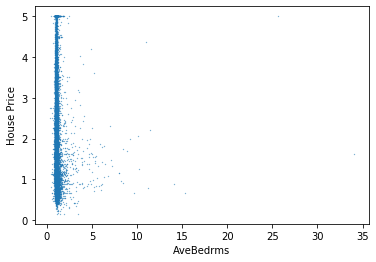

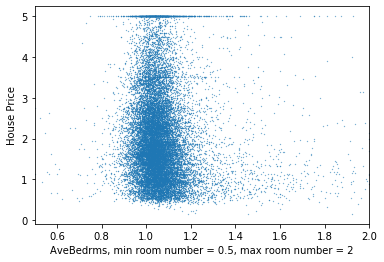

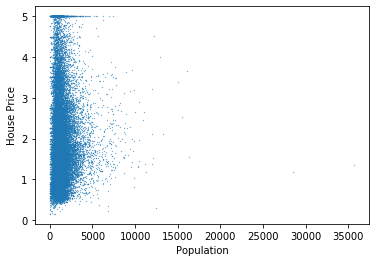

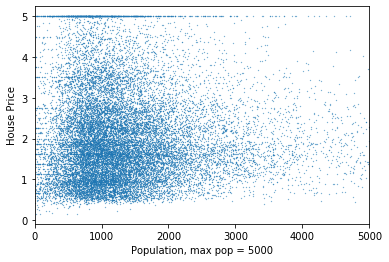

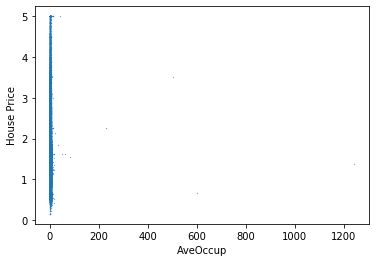

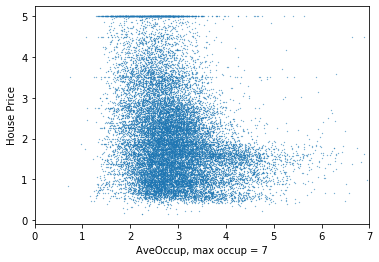

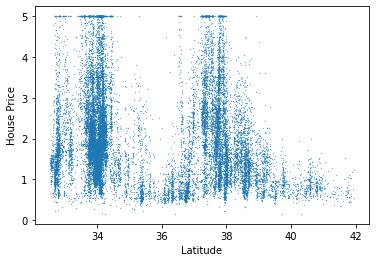

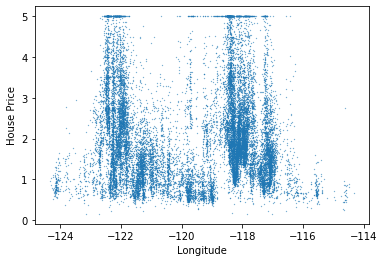

In [3]:
plt.plot(data['MedInc'],y,'.',markersize=0.5)
plt.xlabel('MedInc')
plt.ylabel('House Price')
plt.show()
plt.plot(data['HouseAge'],y,'.',markersize=0.5)
plt.xlabel('HouseAge')
plt.ylabel('House Price')
plt.show()
plt.plot(data['AveRooms'],y,'.',markersize=0.5)
plt.xlabel('AveRooms')
plt.ylabel('House Price')
plt.show()
plt.plot(data['AveRooms'],y,'.',markersize=0.5)
plt.xlabel('AveRooms, max room number = 12')
plt.ylabel('House Price')
plt.xlim(0,12)
plt.show()
plt.plot(data['AveBedrms'],y,'.',markersize=0.5)
plt.xlabel('AveBedrms')
plt.ylabel('House Price')
plt.show()
plt.plot(data['AveBedrms'],y,'.',markersize=0.5)
plt.xlabel('AveBedrms, min room number = 0.5, max room number = 2')
plt.ylabel('House Price')
plt.xlim(0.5,2)
plt.show()
plt.plot(data['Population'],y,'.',markersize=0.5)
plt.xlabel('Population')
plt.ylabel('House Price')
plt.show()
plt.plot(data['Population'],y,'.',markersize=0.5)
plt.xlabel('Population, max pop = 5000')
plt.ylabel('House Price')
plt.xlim(0,5000)
plt.show()
plt.plot(data['AveOccup'],y,'.',markersize=0.5)
plt.xlabel('AveOccup')
plt.ylabel('House Price')
plt.show()
plt.plot(data['AveOccup'],y,'.',markersize=0.5)
plt.xlabel('AveOccup, max occup = 7')
plt.ylabel('House Price')
plt.xlim(0,7)
plt.show()
plt.plot(data['Latitude'],y,'.',markersize=0.5)
plt.xlabel('Latitude')
plt.ylabel('House Price')
plt.show()
plt.plot(data['Longitude'],y,'.',markersize=0.5)
plt.xlabel('Longitude')
plt.ylabel('House Price')
plt.show()

In [4]:
# Create stumps

# bin the data by proportion, 10% in each bin
bins = {}
bin_idx = (np.arange(0,1.1,0.1)*num_samples).astype(np.int16)
bin_idx[-1] = bin_idx[-1]-1
for feature in (feature_names):
    bins[feature] = np.sort(data[feature])[bin_idx]

# decision stumps as weak classifiers
# 0 if not in bin, 1 if in bin
stumps = {}
for feature in feature_names:
    stumps[feature] = np.zeros([num_samples,len(bins[feature])-1])
    for n in range(len(bins[feature])-1):
        stumps[feature][:,n] = data[feature]>bins[feature][n]

# stack the weak classifiers into a matrix
H = np.hstack([stumps[feature] for feature in feature_names])
H = np.hstack([np.ones([num_samples,1]),H])
# prepare the vector for storing weights
alphas = np.zeros(H.shape[1])

### AdaBoost

In [5]:
num_iterations = 30
MSE = np.zeros(num_iterations) # track mean square error

In [6]:
alphas = np.zeros(H.shape[1])
for iteration in range(num_iterations):
    f = np.matmul(H,alphas)
    r = y-f; MSE[iteration] = np.mean(r**2) # r = residual
    v = np.matmul(r.transpose(),H)
    idx = np.argmax(abs(v))# optimal direction to move in
    denom = sum(x**2 for x in H[:,idx])
    increment = v[idx]/denom
    alphas[idx] = alphas[idx] + increment # amount to move in optimal direction

### Plot Results

In [8]:
print(alphas)
print(MSE)

[ 2.06855817  0.          0.04532578  0.24035267  0.05170433  0.30840601
  0.          0.61815591  0.          0.7562429   0.70893994  0.
  0.          0.11005079  0.14071509  0.          0.07791702  0.
  0.          0.          0.          0.          0.         -0.05655599
 -0.10539018  0.          0.          0.          0.          0.
  0.          0.          0.          0.04872434  0.1007982   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.172093   -0.42921386
  0.         -0.06917125 -0.19190968  0.          0.          0.
  0.          0.          0.          0.          0.10092535  0.
 -0.30204764  0.          0.         -0.35429535  0.          0.
 -0.09937558 -0.21562125  0.          0.          0.          0.
 -0.24297072  0.          0.        ]
[5.6104832  1.3315503  1.10277822 0.95540752 0.898362   0.86125809
 0.74690513 0.72025217 0.7

In [9]:
alphasf = {}
start = 1
for feature in feature_names:
    alphasf[feature] = alphas[start:(start+stumps[feature].shape[1])]
    start = start + stumps[feature].shape[1]
alphasf['mean'] = alphas[0]

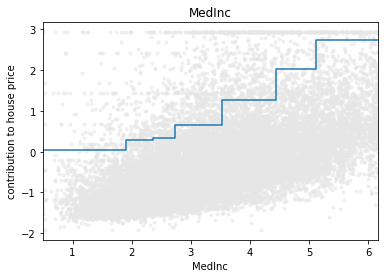

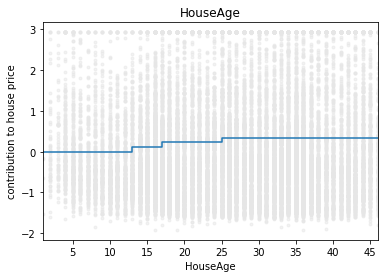

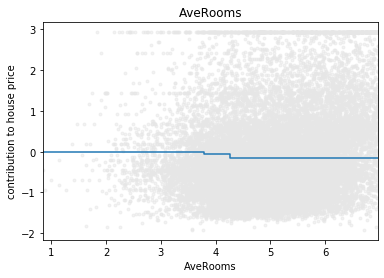

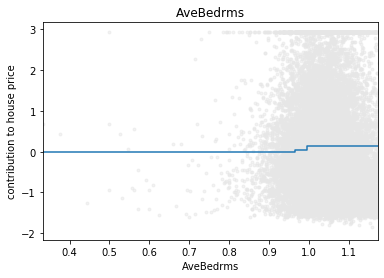

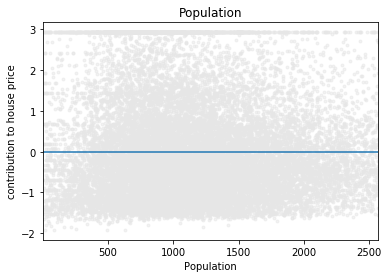

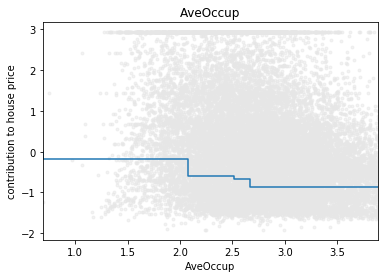

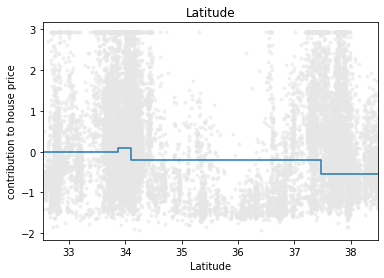

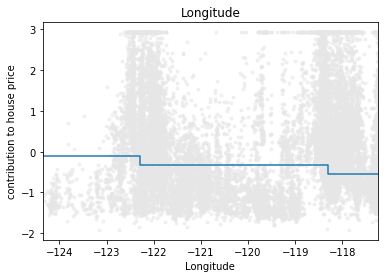

In [10]:
for feature in feature_names:
    plt.close("all")
    plt.plot(data[feature],y-np.mean(y),'.',alpha=0.5,color=[0.9,0.9,0.9])
    # plot stuff
    plt.title(feature)
    plt.xlim([bins[feature][0],bins[feature][-2]])
    plt.xlabel(feature)
    plt.ylabel('contribution to house price')
    plt.step(bins[feature][:-1],np.cumsum(alphasf[feature]))
    plt.show()

### Variable Importance

In [11]:
ret = {}
for feature in feature_names:
    fdata= copy.copy(data[feature])
    np.random.shuffle(fdata)
    gdata = data[feature]
    data[feature] = fdata
    stumps = {}
    for f in feature_names:
        stumps[f] = np.zeros([num_samples,len(bins[f])-1])
        for n in range(len(bins[f])-1):
            stumps[f][:,n] = data[f]>bins[f][n]
    H = np.hstack([stumps[feature] for feature in feature_names])
    H = np.hstack([np.ones([num_samples,1]),H])
    alphas = np.zeros(H.shape[1])
    num_iterations = 30
    MSE1 = np.zeros(num_iterations)
    for iteration in range(num_iterations):
        f = np.matmul(H,alphas)
        r = y-f; MSE1[iteration] = np.mean(r**2) # r = residual
        v = np.matmul(r.transpose(),H)
        idx = np.argmax(abs(v))# optimal direction to move in
        denom = sum(x**2 for x in H[:,idx])
        increment = v[idx]/denom
        alphas[idx] = alphas[idx] + increment # amount to move in optimal direction
    ret[feature]=MSE1[-1]-MSE[-1]
    print('The importance of feature', feature, 'is', ret[feature])
    data[feature]=gdata

The importance of feature MedInc is 0.2824472910265669
The importance of feature HouseAge is 0.008949444593040645
The importance of feature AveRooms is -0.002363527425400136
The importance of feature AveBedrms is 0.001626570973289776
The importance of feature Population is 0.0
The importance of feature AveOccup is 0.05980418168746443
The importance of feature Latitude is 0.03252112351794906
The importance of feature Longitude is 0.03351336756346507


### Boosted Decision Trees

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence

In [13]:
clf = GradientBoostingRegressor(loss="ls")
clf.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarn

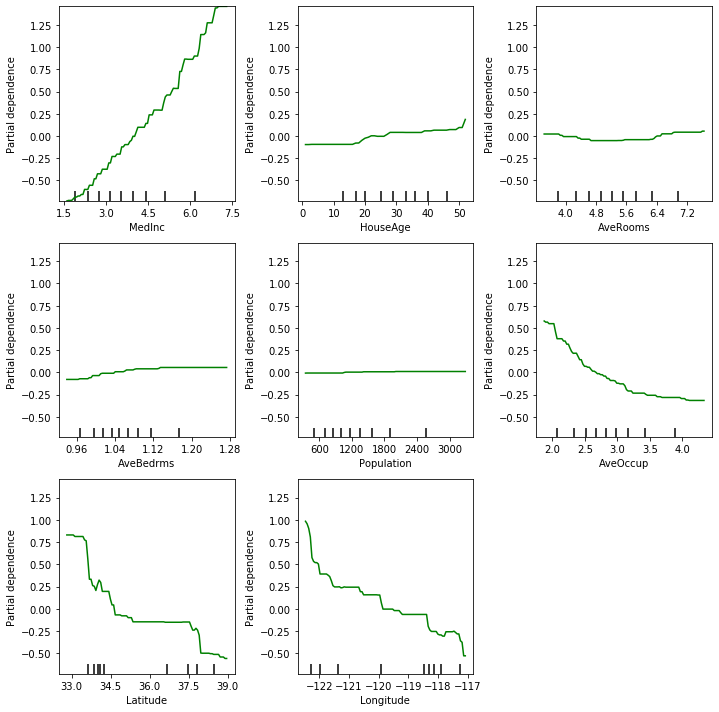

In [14]:
plt.close("all")
plt.figure(figsize=[10,10])
ax = plt.gca()
plot_partial_dependence(clf, X, feature_names, feature_names, n_cols=3, ax=ax) 
plt.tight_layout()
plt.show()

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
clf2 = LinearRegression()
clf2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Comparison in MSE

In [17]:
np.mean((y-clf2.predict(X))**2)

0.5243209861846071

In [18]:
np.mean((y-clf.predict(X))**2)

0.26188431965892933

In [19]:
print(MSE[-1])

0.4953180130155929
